In [1]:
def return_plot(estimator, plot=False):
    df['Predicted_Signal'] = estimator.predict(X)
    df.Predicted_Signal[df.Predicted_Signal > 0.5] = 1
    df.Predicted_Signal[df.Predicted_Signal < 0.5] = -1
    Cumulative_returns = np.cumsum(df[split:]['Returns'])
    df['Startegy_returns'] = df['Returns']* df['Predicted_Signal'].shift(1)
    Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
    print('Return: {}%'.format(round(Cumulative_Strategy_returns[-1]*100, 2)))
    
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(Cumulative_returns, color='r',label = 'Returns')
        plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
        plt.legend()
        plt.show()

def accuracy_plot(estimator):
    # summarize history for accuracy
    plt.plot(estimator.history.history['acc'])
    plt.plot(estimator.history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(estimator.history.history['loss'])
    plt.plot(estimator.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def compare_plot(model_1, model_2):
    plt.plot(model_1.history.history['val_loss'], 'r', model_2.history.history['val_loss'], 'b')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Score')
    plt.legend(['first', 'second'])
    plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import load_model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Activation, TimeDistributed
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adagrad, Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Using TensorFlow backend.


In [3]:
df = pd.read_csv('data/data3_M1.csv', parse_dates=['Datetime'], index_col='Datetime')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5807496 entries, 2003-08-04 03:19:00 to 2019-02-06 23:59:00
Data columns (total 26 columns):
Target                    int64
body_candle               float64
high_low                  float64
macd                      float64
macdsignal                float64
macdhist                  float64
macd-cross                int64
range_ma35                float64
ma35_valid                int64
ma200_valid               int64
35_200_cross              int64
Returns                   float64
ATR                       float64
ATR_diff                  float64
ADX                       float64
ADX_diff                  float64
CCI                       float64
CCI_diff                  float64
MOM                       float64
MOM_diff                  float64
RSI                       float64
RSI_diff                  float64
Linear_regression_diff    float64
Linear_angle_diff         float64
Linear_slope_diff         float64
Linear_interce

In [5]:
X = df.drop('Target', axis=1).values
y = df.Target.values

#split = int(len(df) * 0.60)
#X_train = X[:split]
#X_test = X[split:]
#y_train = y[:split]
#y_test = y[split:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Final Model

In [7]:
early_stop = EarlyStopping(patience=5, monitor='val_acc')
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ada = Adagrad(lr=0.01, epsilon=None, decay=0.0)
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# 7 Layers
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks=[early_stop], verbose=True)

Train on 1626098 samples, validate on 696900 samples
Epoch 1/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2473 - acc: 0.5479 - val_loss: 0.2457 - val_acc: 0.5569
Epoch 2/200
   2784/1626098 [..............................] - ETA: 2:03 - loss: 0.2451 - acc: 0.5636

/home/ballmdr/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `auc_roc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1626098/1626098 [==============================] - 96s 59us/step - loss: 0.2454 - acc: 0.5547 - val_loss: 0.2445 - val_acc: 0.5580
Epoch 3/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2449 - acc: 0.5556 - val_loss: 0.2446 - val_acc: 0.5579
Epoch 4/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2447 - acc: 0.5566 - val_loss: 0.2441 - val_acc: 0.5589
Epoch 5/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2445 - acc: 0.5569 - val_loss: 0.2442 - val_acc: 0.5593
Epoch 6/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2444 - acc: 0.5576 - val_loss: 0.2438 - val_acc: 0.5595
Epoch 7/200
1626098/1626098 [==============================] - 98s 60us/step - loss: 0.2443 - acc: 0.5575 - val_loss: 0.2436 - val_acc: 0.5601
Epoch 8/200
1626098/1626098 [==============================] - 98s 60us/step - loss: 0.2442 - acc: 0.5579 - val_loss: 0.2437 - val_acc: 0.5597
Epoch 9/200

Epoch 59/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2435 - acc: 0.5600 - val_loss: 0.2430 - val_acc: 0.5611
Epoch 60/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2435 - acc: 0.5597 - val_loss: 0.2430 - val_acc: 0.5613
Epoch 61/200
1626098/1626098 [==============================] - 95s 59us/step - loss: 0.2435 - acc: 0.5602 - val_loss: 0.2431 - val_acc: 0.5615
Epoch 62/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2435 - acc: 0.5602 - val_loss: 0.2431 - val_acc: 0.5617
Epoch 63/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2435 - acc: 0.5601 - val_loss: 0.2431 - val_acc: 0.5618
Epoch 64/200
1626098/1626098 [==============================] - 95s 59us/step - loss: 0.2435 - acc: 0.5602 - val_loss: 0.2431 - val_acc: 0.5610
Epoch 65/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2435 - acc: 0.5603 - val_loss: 0.2431 - val_acc:

Epoch 116/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2434 - acc: 0.5607 - val_loss: 0.2431 - val_acc: 0.5618
Epoch 117/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5604 - val_loss: 0.2432 - val_acc: 0.5601
Epoch 118/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2434 - acc: 0.5605 - val_loss: 0.2430 - val_acc: 0.5618
Epoch 119/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2434 - acc: 0.5602 - val_loss: 0.2431 - val_acc: 0.5615
Epoch 120/200
1626098/1626098 [==============================] - 95s 59us/step - loss: 0.2433 - acc: 0.5609 - val_loss: 0.2430 - val_acc: 0.5616
Epoch 121/200
1626098/1626098 [==============================] - 95s 59us/step - loss: 0.2434 - acc: 0.5604 - val_loss: 0.2432 - val_acc: 0.5618
Epoch 122/200
1626098/1626098 [==============================] - 95s 59us/step - loss: 0.2434 - acc: 0.5606 - val_loss: 0.2432 - v

1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5606 - val_loss: 0.2430 - val_acc: 0.5616
Epoch 173/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5610 - val_loss: 0.2432 - val_acc: 0.5617
Epoch 174/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5608 - val_loss: 0.2430 - val_acc: 0.5616
Epoch 175/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5608 - val_loss: 0.2430 - val_acc: 0.5617
Epoch 176/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5608 - val_loss: 0.2431 - val_acc: 0.5616
Epoch 177/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2432 - acc: 0.5615 - val_loss: 0.2432 - val_acc: 0.5616
Epoch 178/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2433 - acc: 0.5609 - val_loss: 0.2430 - val_acc: 0.5621

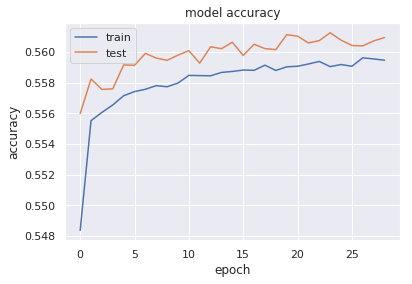

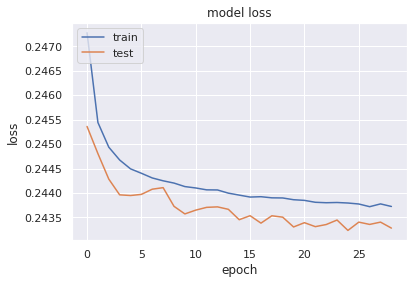

In [11]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
accuracy_plot(model)

In [12]:
print('win rate: {}%'.format(accuracy_score(y_test, y_pred)*100))

win rate: 56.01133936653142%


In [13]:
model.save('h5/keras_data3_M1_56.h5')
del model

In [44]:
model = load_model('keras_53.h5')

In [17]:
model2 = Sequential()
model2.add(Dense(250, activation='relu', input_shape=(X.shape[1],)))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(250, activation='relu'))
model2.add(Dropout(.5))
model2.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks=[early_stop], verbose=True)

Train on 1626098 samples, validate on 696900 samples
Epoch 1/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2452 - acc: 0.5554 - val_loss: 0.2442 - val_acc: 0.5584
Epoch 2/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2441 - acc: 0.5582 - val_loss: 0.2436 - val_acc: 0.5597
Epoch 3/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2438 - acc: 0.5593 - val_loss: 0.2437 - val_acc: 0.5594
Epoch 4/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2436 - acc: 0.5598 - val_loss: 0.2434 - val_acc: 0.5602
Epoch 5/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2434 - acc: 0.5603 - val_loss: 0.2434 - val_acc: 0.5609
Epoch 6/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2432 - acc: 0.5610 - val_loss: 0.2433 - val_acc: 0.5610
Epoch 7/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.24

1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2367 - acc: 0.5833 - val_loss: 0.2467 - val_acc: 0.5553
Epoch 58/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2366 - acc: 0.5841 - val_loss: 0.2473 - val_acc: 0.5552
Epoch 59/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2365 - acc: 0.5842 - val_loss: 0.2476 - val_acc: 0.5536
Epoch 60/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2364 - acc: 0.5843 - val_loss: 0.2475 - val_acc: 0.5530
Epoch 61/200
1626098/1626098 [==============================] - 89s 54us/step - loss: 0.2363 - acc: 0.5850 - val_loss: 0.2473 - val_acc: 0.5526
Epoch 62/200
1626098/1626098 [==============================] - 89s 54us/step - loss: 0.2361 - acc: 0.5850 - val_loss: 0.2479 - val_acc: 0.5540
Epoch 63/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2360 - acc: 0.5856 - val_loss: 0.2476 - val_acc: 0.5539
Epoch

Epoch 114/200
1626098/1626098 [==============================] - 89s 54us/step - loss: 0.2319 - acc: 0.5978 - val_loss: 0.2519 - val_acc: 0.5502
Epoch 115/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2319 - acc: 0.5971 - val_loss: 0.2522 - val_acc: 0.5482
Epoch 116/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2319 - acc: 0.5973 - val_loss: 0.2522 - val_acc: 0.5487
Epoch 117/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2319 - acc: 0.5972 - val_loss: 0.2512 - val_acc: 0.5494
Epoch 118/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2318 - acc: 0.5978 - val_loss: 0.2521 - val_acc: 0.5486
Epoch 119/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2318 - acc: 0.5978 - val_loss: 0.2519 - val_acc: 0.5491
Epoch 120/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2317 - acc: 0.5982 - val_loss: 0.2526 - v

1626098/1626098 [==============================] - 89s 54us/step - loss: 0.2298 - acc: 0.6028 - val_loss: 0.2549 - val_acc: 0.5489
Epoch 171/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2298 - acc: 0.6031 - val_loss: 0.2548 - val_acc: 0.5472
Epoch 172/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2298 - acc: 0.6031 - val_loss: 0.2543 - val_acc: 0.5490
Epoch 173/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2297 - acc: 0.6026 - val_loss: 0.2543 - val_acc: 0.5492
Epoch 174/200
1626098/1626098 [==============================] - 89s 54us/step - loss: 0.2298 - acc: 0.6028 - val_loss: 0.2548 - val_acc: 0.5485
Epoch 175/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2297 - acc: 0.6025 - val_loss: 0.2548 - val_acc: 0.5488
Epoch 176/200
1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2298 - acc: 0.6024 - val_loss: 0.2538 - val_acc: 0.5478

In [18]:
model3 = Sequential()
model3.add(Dense(250, activation='relu', input_shape=(X.shape[1],)))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks=[early_stop], verbose=True)

Train on 1626098 samples, validate on 696900 samples
Epoch 1/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2449 - acc: 0.5561 - val_loss: 0.2438 - val_acc: 0.5592
Epoch 2/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2439 - acc: 0.5592 - val_loss: 0.2438 - val_acc: 0.5595
Epoch 3/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2435 - acc: 0.5599 - val_loss: 0.2436 - val_acc: 0.5597
Epoch 4/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2433 - acc: 0.5609 - val_loss: 0.2434 - val_acc: 0.5601
Epoch 5/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2431 - acc: 0.5615 - val_loss: 0.2432 - val_acc: 0.5611
Epoch 6/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2429 - acc: 0.5618 - val_loss: 0.2433 - val_acc: 0.5606
Epoch 7/200
1626098/1626098 [==============================] - 85s 52us/step - loss: 0.24

1626098/1626098 [==============================] - 88s 54us/step - loss: 0.2275 - acc: 0.6175 - val_loss: 0.2565 - val_acc: 0.5432
Epoch 58/200
1626098/1626098 [==============================] - 99s 61us/step - loss: 0.2272 - acc: 0.6184 - val_loss: 0.2572 - val_acc: 0.5403
Epoch 59/200
1626098/1626098 [==============================] - 95s 58us/step - loss: 0.2269 - acc: 0.6195 - val_loss: 0.2576 - val_acc: 0.5394
Epoch 60/200
1626098/1626098 [==============================] - 96s 59us/step - loss: 0.2267 - acc: 0.6197 - val_loss: 0.2571 - val_acc: 0.5434
Epoch 61/200
1626098/1626098 [==============================] - 87s 54us/step - loss: 0.2264 - acc: 0.6206 - val_loss: 0.2580 - val_acc: 0.5417
Epoch 62/200
1626098/1626098 [==============================] - 90s 56us/step - loss: 0.2261 - acc: 0.6219 - val_loss: 0.2585 - val_acc: 0.5390
Epoch 63/200
1626098/1626098 [==============================] - 89s 55us/step - loss: 0.2259 - acc: 0.6224 - val_loss: 0.2585 - val_acc: 0.5423
Epoch

Epoch 114/200
1626098/1626098 [==============================] - 96s 59us/step - loss: 0.2170 - acc: 0.6470 - val_loss: 0.2703 - val_acc: 0.5336
Epoch 115/200
1626098/1626098 [==============================] - 97s 60us/step - loss: 0.2168 - acc: 0.6474 - val_loss: 0.2695 - val_acc: 0.5350
Epoch 116/200
1626098/1626098 [==============================] - 92s 57us/step - loss: 0.2168 - acc: 0.6475 - val_loss: 0.2698 - val_acc: 0.5343
Epoch 117/200
1626098/1626098 [==============================] - 96s 59us/step - loss: 0.2166 - acc: 0.6479 - val_loss: 0.2699 - val_acc: 0.5355
Epoch 118/200
1626098/1626098 [==============================] - 100s 62us/step - loss: 0.2165 - acc: 0.6483 - val_loss: 0.2700 - val_acc: 0.5356
Epoch 119/200
1626098/1626098 [==============================] - 91s 56us/step - loss: 0.2164 - acc: 0.6485 - val_loss: 0.2701 - val_acc: 0.5349
Epoch 120/200
1626098/1626098 [==============================] - 91s 56us/step - loss: 0.2163 - acc: 0.6493 - val_loss: 0.2697 - 

1626098/1626098 [==============================] - 85s 52us/step - loss: 0.2118 - acc: 0.6603 - val_loss: 0.2754 - val_acc: 0.5329
Epoch 171/200
1626098/1626098 [==============================] - 86s 53us/step - loss: 0.2117 - acc: 0.6604 - val_loss: 0.2763 - val_acc: 0.5319
Epoch 172/200
1626098/1626098 [==============================] - 87s 54us/step - loss: 0.2117 - acc: 0.6603 - val_loss: 0.2759 - val_acc: 0.5348
Epoch 173/200
1626098/1626098 [==============================] - 87s 54us/step - loss: 0.2116 - acc: 0.6606 - val_loss: 0.2761 - val_acc: 0.5324
Epoch 174/200
1626098/1626098 [==============================] - 87s 54us/step - loss: 0.2115 - acc: 0.6608 - val_loss: 0.2766 - val_acc: 0.5323
Epoch 175/200
1626098/1626098 [==============================] - 87s 53us/step - loss: 0.2114 - acc: 0.6609 - val_loss: 0.2773 - val_acc: 0.5323
Epoch 176/200
1626098/1626098 [==============================] - 86s 53us/step - loss: 0.2114 - acc: 0.6615 - val_loss: 0.2770 - val_acc: 0.5334

In [20]:
def make_model(dense_layers, activation, dropout):
    '''Creates a multi-layer perceptron model
    
    dense_layers: List of layer sizes; one number per layer
    '''

    model = Sequential()
    for i, layer_size in enumerate(dense_layers, 1):
        if i == 1:
            model.add(Dense(layer_size, input_dim=X.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(layer_size))
            model.add(Activation(activation))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['binary_accuracy', auc_roc])

    return model

def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.metrics.auc(y_true, y_pred)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

In [21]:
param_grid = {'dense_layers': [[32], [32, 32], [64], [64, 64], [64, 64, 32], [64, 32], [128]],
              'activation'  : ['relu', 'tanh'],
              'dropout'     : [.25, .5, .75],
              }

clf = KerasClassifier(make_model, epochs=10, batch_size=128)
grid_cv = GridSearchCV(clf, param_grid, cv=5, refit=True, return_train_score=True, n_jobs=-1, verbose=1, iid=False, error_score=np.nan, scoring='roc_auc')
early_stop = EarlyStopping(monitor='auc_roc', patience=300, verbose=1, mode='max')

grid_cv.fit(X_train, y_train, callbacks=[early_stop], verbose=2, epochs=50)
print('\nBest Score: {:.2%}'.format(grid_cv.best_score_))
print('\nBest Params:\n', pd.Series(grid_cv.best_params_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [45]:
final_model = grid_cv.best_estimator_

In [46]:
return_plot(final_model)

/home/ballmdr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ballmdr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


IndexError: -1

In [47]:
y_pred = final_model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

52.872215911120946


In [51]:
model.save('h5/keras_data2_M1_53_2.h5')